# 生成已标记的数据集并直观显示

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = make_classification(n_features=2, n_redundant=0)

In [4]:
X = data[0]
y = data[1]

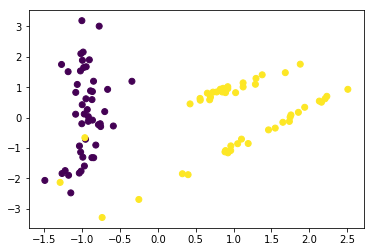

In [9]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])

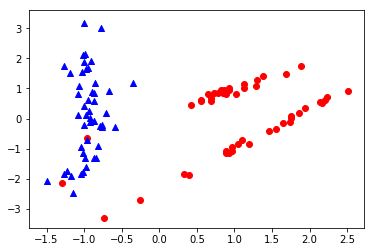

In [10]:
plt.scatter(data[0][y==1][:,0],data[0][y==1][:,1],c='red',marker='o')
plt.scatter(data[0][y==0][:,0],data[0][y==0][:,1],c='blue',marker='^')

# 训练

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
KNN = KNeighborsClassifier()

In [7]:
KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
KNN.score(X,y)

0.94

# 预测

In [9]:
KNN.predict([[2,2]])

array([1])

In [10]:
KNN.predict_proba([[2,2]])

array([[0., 1.]])

# 把带预测的样本以及和其最近的5个点标记出来

In [44]:
X_sample = [[1,-2]]
neighbors = KNN.kneighbors(X_sample,return_distance= False)

In [45]:
for i in neighbors[0]:
    print(i)

40
38
61
23
97


In [46]:
X_sample[0]

[1, -2]

In [47]:
X[0]

array([-1.95419352, -2.05946458])

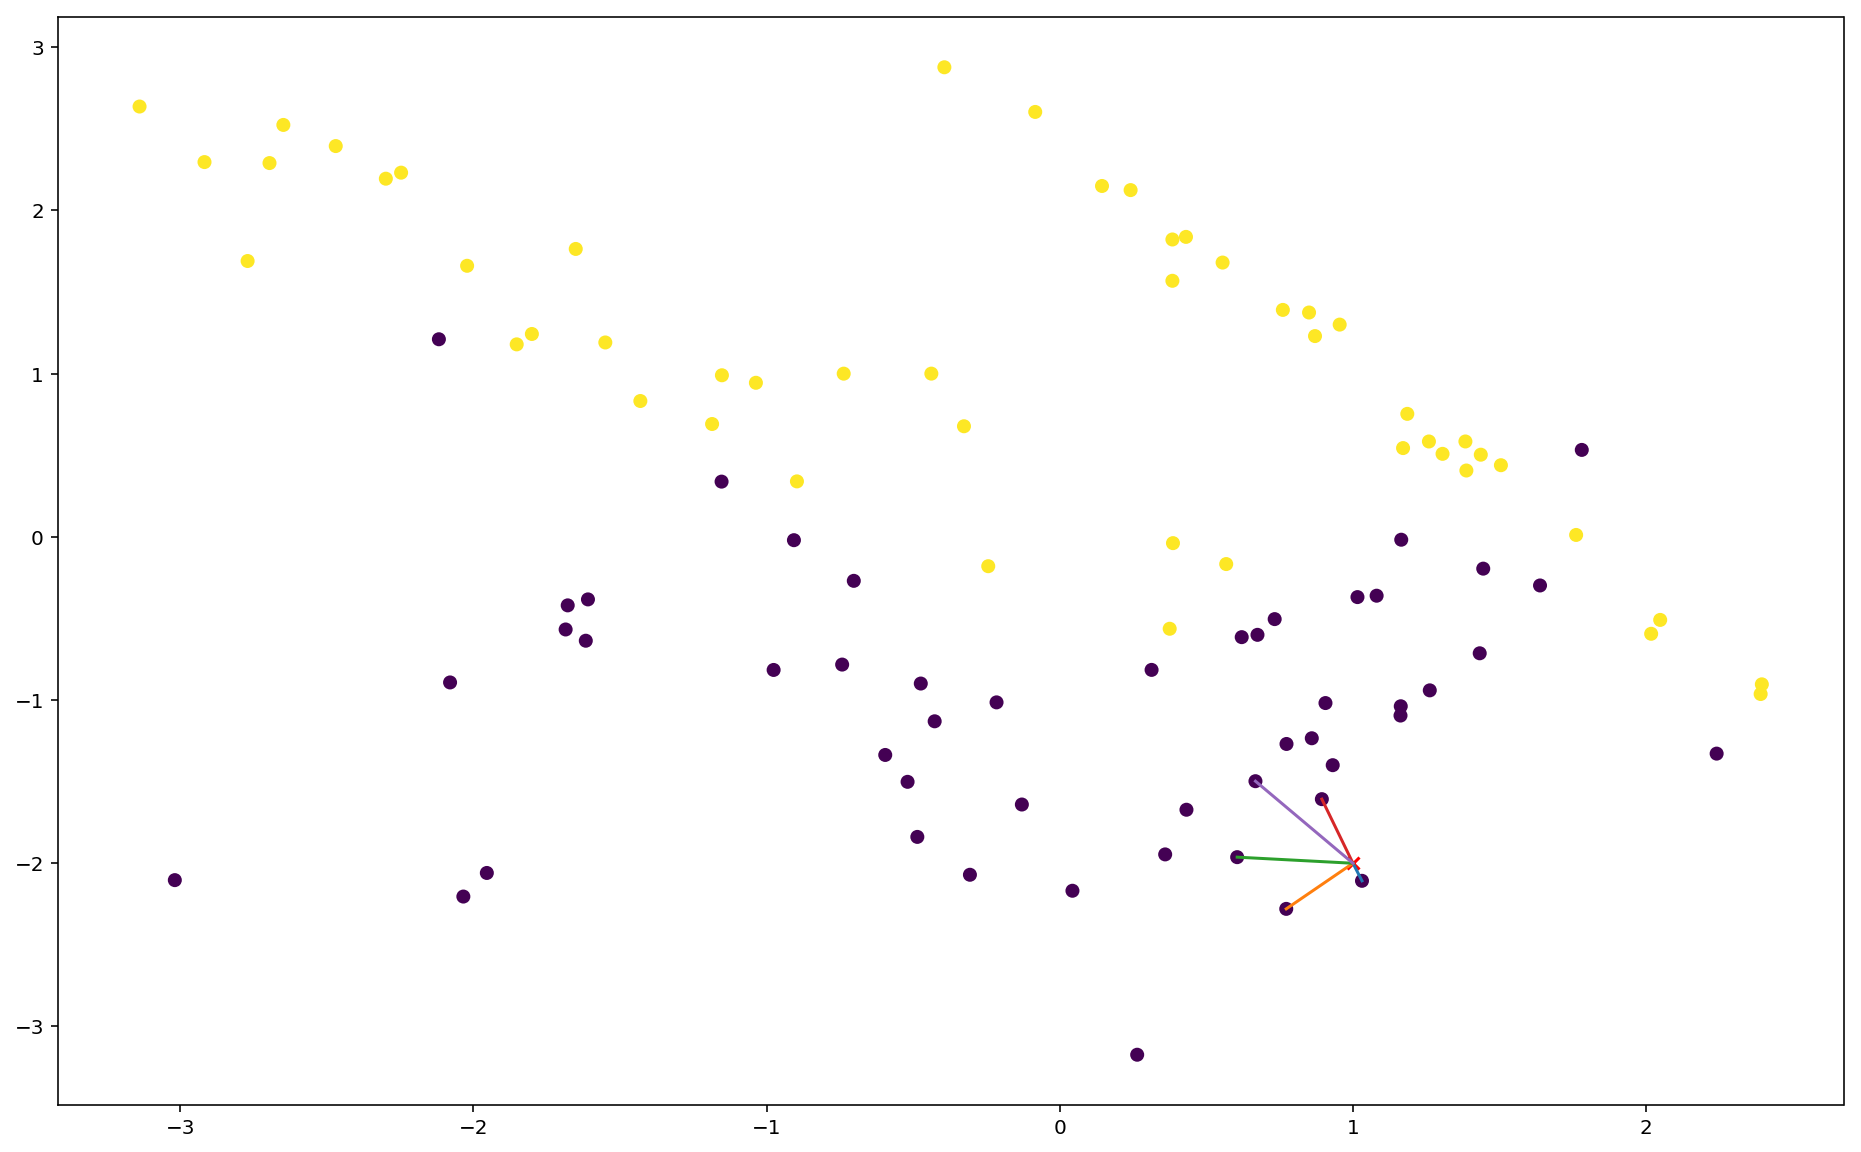

In [48]:
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.scatter(X_sample[0][0],X_sample[0][1],marker = 'x',c='red')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]])